In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
start = datetime.datetime(2022,11,25)
end = datetime.datetime(2023,11,25)
ws = yf.download('PAGEIND.NS',start,end)
ws['SMA30'] = ws['Close'].rolling(30).mean()

[*********************100%%**********************]  1 of 1 completed


In [4]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30
Date,,,,,,,
2022-11-25,46779.800781,47337.250000,46586.101562,47233.398438,46908.191406,10744,NaN
2022-11-28,47000.000000,47549.851562,47000.000000,47326.648438,47000.808594,9588,NaN
2022-11-29,47400.000000,47509.300781,47020.101562,47092.351562,46768.117188,9362,NaN
2022-11-30,47150.000000,47500.000000,46666.000000,47416.648438,47090.183594,30007,NaN
2022-12-01,47454.949219,47850.000000,47165.449219,47566.050781,47238.554688,17810,NaN


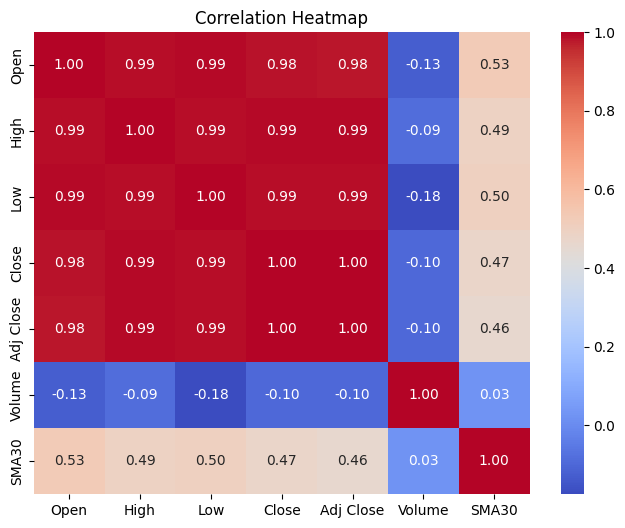

In [5]:
# Calculate the correlation matrix
correlation_matrix = ws.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")  # Optional: Set the title
# Display the heatmap
plt.show()

In [6]:

ws['Close'] = ws['Close'].round(2)
date = ws.index
ws['Underlying Log Returns (C)'] = np.log(ws['Close'] / ws['Close'].shift(1))
ws['Underlying Log Returns (C)'] = ws['Underlying Log Returns (C)'].round(4)
ws.index = range(len(ws))
ws.loc[0,'Previous Day Underlying Volatility (D)'] = 0.0188

index=1
print(ws.at[0, 'Previous Day Underlying Volatility (D)'])
print(ws.at[index-1,'Previous Day Underlying Volatility (D)'])
print(ws.at[1, 'Underlying Log Returns (C)'])

# Calculate 'Current Day Underlying Daily Volatility (E)' iteratively
for index in range(1, len(ws)):  # Start from index + 1
          # For the first row, the formula uses the initial 'Previous Day Underlying Volatility (D)'
          ws.at[index, 'Current Day Underlying Daily Volatility (E)'] = np.sqrt(0.995 * ws.at[index-1,'Previous Day Underlying Volatility (D)'] ** 2 + 0.005 * ws.at[index,'Underlying Log Returns (C)'] ** 2)
          # ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)'].round(4)
          ws.at[index, 'Previous Day Underlying Volatility (D)'] = ws.at[index, 'Current Day Underlying Daily Volatility (E)']
# Assuming df is your DataFrame
#ws = ws.drop(ws.index[-1])
ws.index=date
ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)']
ws = ws.iloc[1:]

0.0188
0.0188
0.002


In [7]:
ws.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2023-11-20,37495.601562,37735.949219,37323.050781,37525.45,37525.449219,11200,38061.683464,0.0008,0.015084,0.015084
2023-11-21,37598.949219,38072.000000,37503.050781,37704.35,37704.351562,14227,38004.700130,0.0048,0.015050,0.015050
2023-11-22,37750.000000,38285.000000,37600.000000,37771.50,37771.500000,14443,37948.288411,0.0018,0.015013,0.015013
2023-11-23,37878.000000,37960.851562,37600.000000,37697.05,37697.050781,8197,37893.698438,-0.0020,0.014976,0.014976
2023-11-24,37838.949219,37838.949219,37412.000000,37504.00,37504.000000,14525,37826.703385,-0.0051,0.014943,0.014943


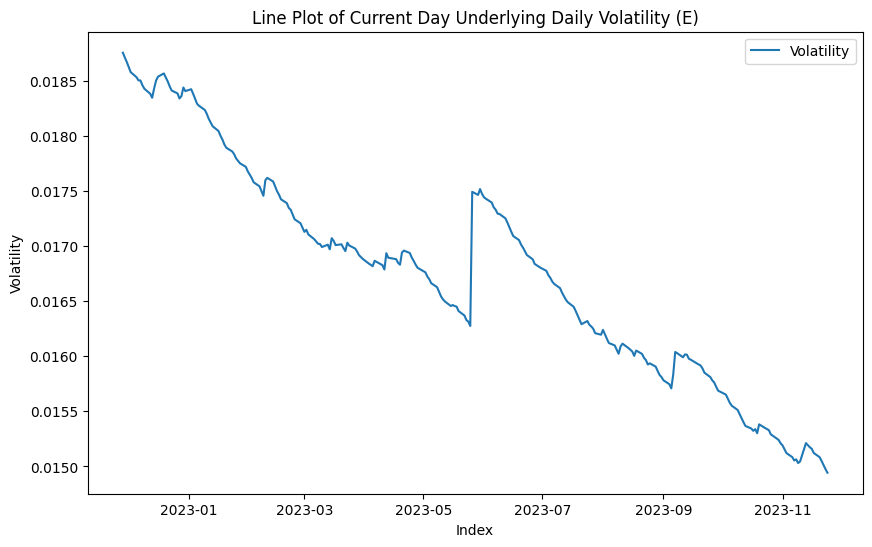

In [8]:
# Assuming you have your DataFrame 'ws' with the relevant data
# Create a line plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Line Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend

# Display the plot
plt.show()


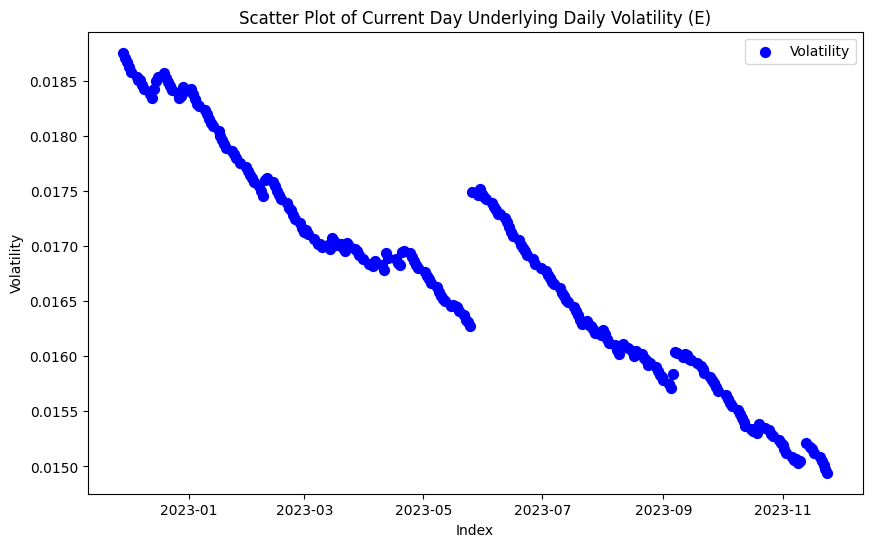

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'ws' with the relevant data

# Create a scatter plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility', marker='o', s=50, c='blue')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Scatter Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend
# Display the plot
plt.show()

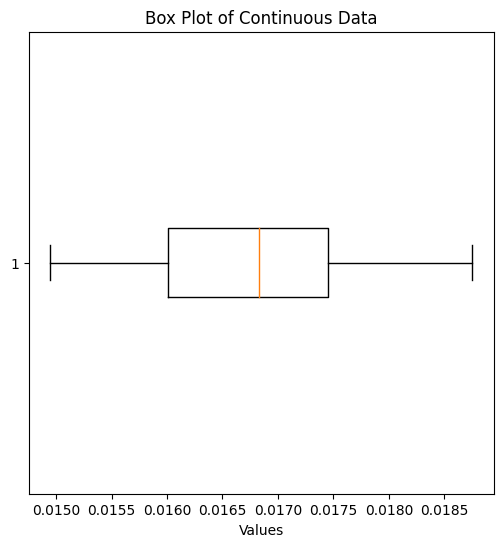

In [10]:
# Create a box plot
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.boxplot(ws['Current Day Underlying Daily Volatility (E)'], vert=False)  # Create a horizontal box plot (vert=False)
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.title('Box Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

<ipython-input-11-065e43bdf794>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading


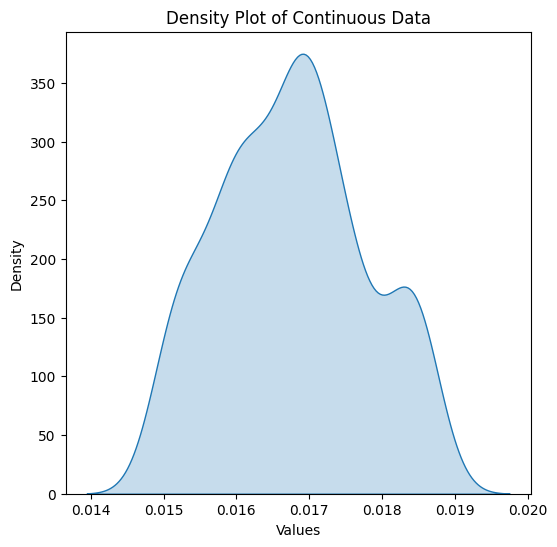

In [11]:
# Create a density plot (Kernel Density Estimation)
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.ylabel('Density')  # Optional: Set the y-axis label
plt.title('Density Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

In [12]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2022-11-28,47000.000000,47549.851562,47000.000000,47326.65,47000.808594,9588,NaN,0.0020,0.018753,0.018753
2022-11-29,47400.000000,47509.300781,47020.101562,47092.35,46768.117188,9362,NaN,-0.0050,0.018710,0.018710
2022-11-30,47150.000000,47500.000000,46666.000000,47416.65,47090.183594,30007,NaN,0.0069,0.018669,0.018669
2022-12-01,47454.949219,47850.000000,47165.449219,47566.05,47238.554688,17810,NaN,0.0031,0.018624,0.018624
2022-12-02,47501.000000,47780.898438,47200.101562,47539.15,47211.843750,10355,NaN,-0.0006,0.018577,0.018577


In [13]:
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

In [14]:
last_x = x.iloc[-5:]
last_y = y.iloc[-5:]
x = x.iloc[:-5]
y = y.iloc[:-5]

In [15]:
last_x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-11-20,37495.601562,37735.949219,37323.050781,37525.45,37525.449219,11200,0.0008,0.015084
2023-11-21,37598.949219,38072.000000,37503.050781,37704.35,37704.351562,14227,0.0048,0.015050
2023-11-22,37750.000000,38285.000000,37600.000000,37771.50,37771.500000,14443,0.0018,0.015013
2023-11-23,37878.000000,37960.851562,37600.000000,37697.05,37697.050781,8197,-0.0020,0.014976
2023-11-24,37838.949219,37838.949219,37412.000000,37504.00,37504.000000,14525,-0.0051,0.014943


In [16]:
last_y

Date
2023-11-20    0.015084
2023-11-21    0.015050
2023-11-22    0.015013
2023-11-23    0.014976
2023-11-24    0.014943
Name: Current Day Underlying Daily Volatility (E), dtype: float64

In [17]:
x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2022-11-28,47000.000000,47549.851562,47000.000000,47326.65,47000.808594,9588,0.0020,0.018753
2022-11-29,47400.000000,47509.300781,47020.101562,47092.35,46768.117188,9362,-0.0050,0.018710
2022-11-30,47150.000000,47500.000000,46666.000000,47416.65,47090.183594,30007,0.0069,0.018669
2022-12-01,47454.949219,47850.000000,47165.449219,47566.05,47238.554688,17810,0.0031,0.018624
2022-12-02,47501.000000,47780.898438,47200.101562,47539.15,47211.843750,10355,-0.0006,0.018577
...,...,...,...,...,...,...,...,...
2023-11-10,37691.550781,38430.000000,37400.000000,38360.65,38283.808594,29199,0.0177,0.015046
2023-11-13,38469.949219,38469.949219,36900.000000,37035.85,36961.667969,42823,-0.0351,0.015212
2023-11-15,37428.851562,37428.851562,36810.000000,36995.75,36921.644531,26305,-0.0011,0.015174


In [18]:
x.shape

(241, 8)

In [19]:

y.shape

(241,)

Polynomial regression

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train=x_train.to_numpy().reshape(-1,1)
# print(x_train.shape)

(196, 8)
(50, 8)
(196,)
(50,)


In [42]:
x_test.dtypes

Open                                      float64
High                                      float64
Low                                       float64
Close                                     float64
Adj Close                                 float64
Volume                                      int64
Underlying Log Returns (C)                float64
Previous Day Underlying Volatility (D)    float64
dtype: object

In [43]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-02-28,37980.000000,38409.500000,37856.550781,37969.65,37766.738281,25983,0.0046,0.017166
2023-02-20,38878.148438,39095.101562,38370.898438,38573.55,38367.414062,16664,-0.0079,0.017389
2023-09-06,39560.000000,41149.898438,39444.800781,40806.40,40724.660156,39093,0.0324,0.015836
2023-05-12,41740.000000,42305.898438,41440.000000,42254.50,42028.687500,17268,0.0121,0.016497
2023-09-04,39990.000000,40022.050781,39436.699219,39618.45,39539.089844,16605,-0.0051,0.015746


In [44]:
poly = PolynomialFeatures(degree=3)#on degree 1 it gives exact values on 2 less accurate and 3 may be a sort of best fit to the algorithm
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)
X_poly_testf = poly.fit_transform(last_x)
poly.fit(X_poly,y_train)
lin2=LinearRegression()
lin2.fit(X_poly,y_train)

LinearRegression()

In [45]:
y_pred=lin2.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)

Mean Squared Error: 1.9103691231080343e-08
Mean aboslute Error: 4.843809397267231e-05
Mean absolute percentage Error: 0.0029123278589462324


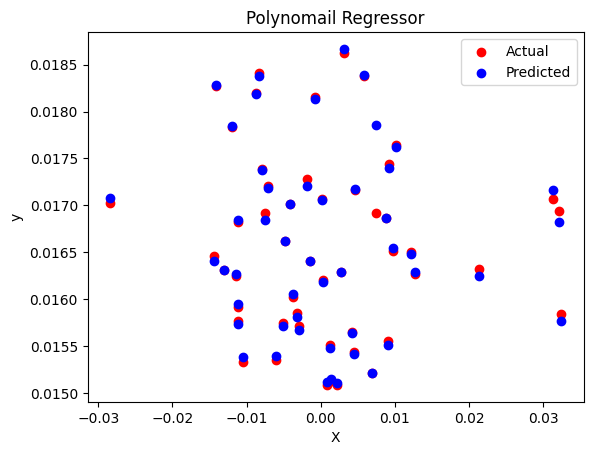

In [46]:
xtes=x_test['Underlying Log Returns (C)']
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Polynomail Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [26]:
print(y_pred[:10])


[1.62877096e-02 1.64010690e-02 1.74043133e-02 1.70181426e-02
 1.58967260e-02 1.78914541e-02 1.84013634e-02 1.64609866e-02
 1.34502151e+03 1.64121294e-02]


In [27]:
print(x_test[:10])

                    Open          High           Low     Close     Adj Close  \
Date                                                                           
2023-05-11  41350.000000  41880.000000  41299.000000  41748.35  41525.246094   
2023-07-07  37124.000000  37428.500000  36423.000000  36560.85  36421.308594   
2023-08-31  39900.000000  40700.000000  39700.000000  40153.20  40072.769531   
2023-06-13  38390.949219  38470.000000  38114.601562  38386.65  38240.136719   
2023-09-21  39990.000000  40219.000000  39460.000000  39519.90  39440.738281   
2023-01-24  40602.101562  40787.949219  40050.000000  40116.65  39840.445312   
2023-01-03  42140.000000  42398.800781  41800.000000  42166.35  41876.031250   
2023-07-28  37364.000000  37466.148438  37225.000000  37311.70  37169.289062   
2023-03-29  37725.000000  38490.199219  37559.050781  38171.80  37967.808594   
2023-06-01  39240.000000  39250.000000  38704.000000  39133.45  38924.320312   

            Volume  Underlying Log Retu

In [28]:
y_pred=lin2.predict(X_poly_testf)
print(y_pred.round(4))

[0.015  0.015  0.0148 0.0147 0.0146]


2.KNN Regressor

Mean Squared Error: 9.92867216287263e-07
Mean aboslute Error: 0.0008509757678237151
Mean absolute percentage Error: 0.051759684646143084


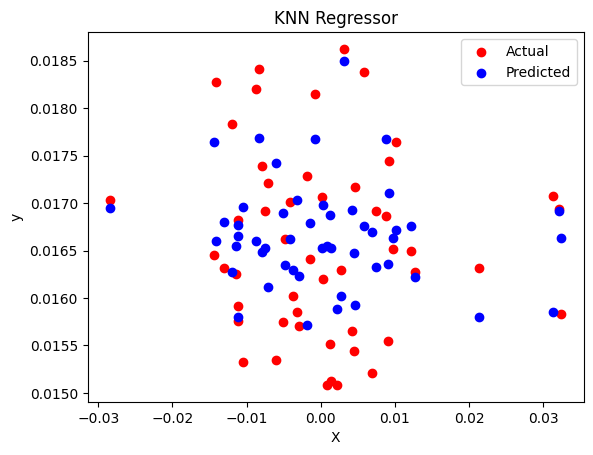

In [29]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('KNN Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3.SVM REGRESSOR

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 7.07027522474182, 'epsilon': 1.8588899628315179, 'C': 167.4254087982183}
Mean Squared Error: 9.9136866799379e-07
Mean aboslute Error: 0.0008297536410201645
Mean absolute percentage Error: 0.05073208408689761
Mean Squared Error with Best Hyperparameters: 9.9136866799379e-07


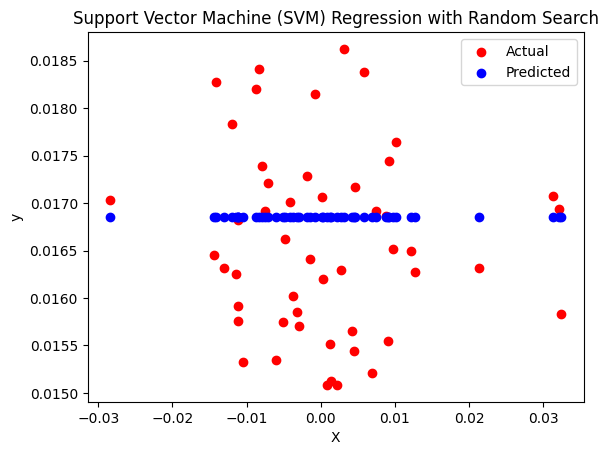

In [30]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Define the parameter grid for random search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.random.rand(20) * 1000,
    'gamma': np.random.rand(20) * 10,
    'epsilon': np.random.rand(20) * 2
}

# Create SVR object
svr = SVR()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_iter=100)

random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Apply the best hyperparameters to SVR
best_svr = SVR(**best_params)

# Fit the model on the training data with the best hyperparameters
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print(f'Mean Squared Error with Best Hyperparameters: {mse}')

xtes = X_test['Underlying Log Returns (C)']

# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Support Vector Machine (SVM) Regression with Random Search')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4.ARIMA (AutoRegressive Integrated Moving Average)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 7.020481336798089e-06
Mean aboslute Error: 0.0012137421466523733
Mean absolute percentage Error: 0.07305333820321211
Mean Squared Error: 7.020481336798089e-06
(50, 7)
(50,)


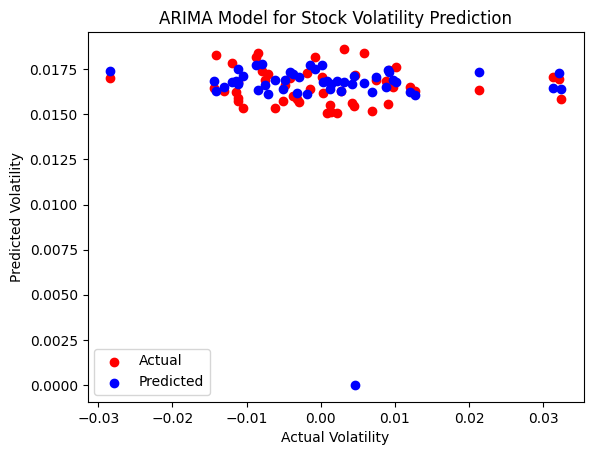

In [31]:
import statsmodels.api as sm

# Prepare the data for ARIMA
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)']]
y = ws['Current Day Underlying Daily Volatility (E)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Fit the ARIMA model
arima_model = sm.tsa.arima.ARIMA(y_train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Make predictions on the test data
y_pred = arima_model_fit.predict(start=0, end=len(x_test)-1)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print("Mean Squared Error:", mse)
print(x_test.shape)
print(y_test.shape)
xtes=x_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('ARIMA Model for Stock Volatility Prediction')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()


In [32]:
print(y_test.shape)
print(y_pred.shape)

(50,)
(50,)


5.Random forest regressor

Mean Squared Error: 6.094605160937325e-10
Mean aboslute Error: 1.627796655822921e-05
Mean absolute percentage Error: 0.0009696190878239483


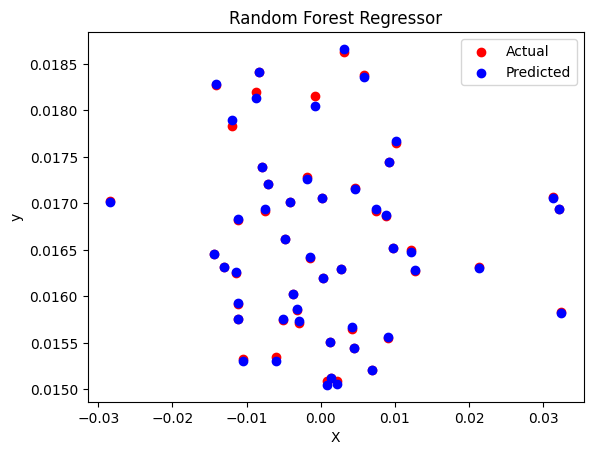

In [33]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


6.LSTM

In [34]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)



Epoch 1/100
7/7 [==============================] - 12s 25ms/step - loss: 0.0013
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 2.4292e-04
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 8.7693e-05
Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 6.5333e-05
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 4.3340e-05
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 1.8242e-05
Epoch 7/100
7/7 [==============================] - 0s 21ms/step - loss: 8.6312e-06
Epoch 8/100
7/7 [==============================] - 0s 33ms/step - loss: 4.3565e-06
Epoch 9/100
7/7 [==============================] - 0s 26ms/step - loss: 3.2555e-06
Epoch 10/100
7/7 [==============================] - 0s 24ms/step - loss: 1.9857e-06
Epoch 11/100
7/7 [==============================] - 0s 20ms/step - loss: 1.6879e-06
Epoch 12/100
7/7 [==============================] - 0s 19ms/step - loss: 1.3784e-06
Epoc

Mean Squared Error: 1.3694109002237452e-07
Mean aboslute Error: 0.0002869276069560449
Mean absolute percentage Error: 0.017238239111221316
(50,)
(50,)


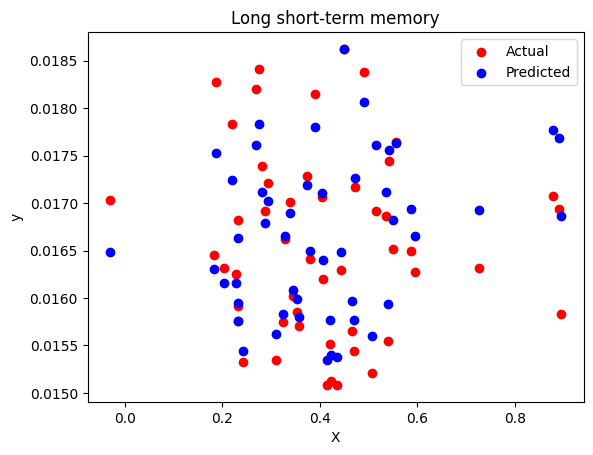

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Long short-term memory')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

7.RNN

In [36]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(64), return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(32)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/100
7/7 [==============================] - 6s 24ms/step - loss: 0.3149
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 0.1176
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0436
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0425
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0127
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0102
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0059
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 11/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 12/100
7/7 [==============================] - 0s 11ms/step - loss: 9.0452e-04
Epoch 13/100
7/7 [===========================

Mean Squared Error: 4.4084842143626596e-05
Mean aboslute Error: 0.004947635846195497
Mean absolute percentage Error: 0.29712480695183685
(50,)
(50,)


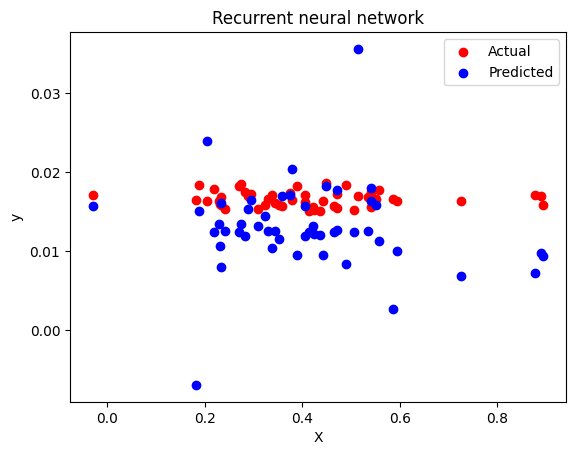

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Recurrent neural network')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()